In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from MortalityPrediction.src.ml_utils import read_and_extract_features, print_metrics_binary, Reader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

In [9]:
DATA = "MortalityPrediction/data/preprocessed_data/"

In [10]:
#dataset reader
train_reader = Reader(dataset_dir=DATA + "train", listfile=DATA + "train_listfile.csv")
val_reader = Reader(dataset_dir=DATA + "train", listfile=DATA + "val_listfile.csv")
test_reader = Reader(dataset_dir=DATA + "test", listfile=DATA + "test_listfile.csv")                
print('Reading data and extracting features ...')
(train_X, train_y) = read_and_extract_features(train_reader)
(val_X, val_y) = read_and_extract_features(val_reader)
(test_X, test_y) = read_and_extract_features(test_reader)

print('Imputing missing values ...')
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0, copy=True)
imputer.fit(train_X)
train_X = np.array(imputer.transform(train_X), dtype=np.float32)
val_X = np.array(imputer.transform(val_X), dtype=np.float32)
test_X = np.array(imputer.transform(test_X), dtype=np.float32)
print('Normalizing the data to have zero mean and unit variance ...')
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)

Reading data and extracting features ...


Imputing missing values ...


Normalizing the data to have zero mean and unit variance ...


In [11]:
print(len(train_X))
print(len(train_X[0]))

14681
714


In [12]:
clf = LogisticRegression(penalty="l2", C=0.001, solver='lbfgs')
clf.fit(train_X, train_y)
print("coef_: ", np.array(clf.coef_))
#print result in terminal
print('\nResults on train set')
print_metrics_binary(train_y, clf.predict_proba(train_X))
print('\nResults on eval set')
print_metrics_binary(val_y, clf.predict_proba(val_X))
prediction = clf.predict_proba(test_X)[:, 1]
print('\nResults on test set')
print_metrics_binary(test_y, prediction)

coef_:  [[ 3.37299253e-03  1.11993325e-02  2.51913479e-03  1.57538515e-02
   3.44756841e-03 -4.09424638e-03 -9.79094171e-03 -1.35300967e-03
  -5.24794373e-03  2.77960175e-02 -7.32993336e-03 -1.19106652e-02
  -3.39308511e-03 -2.06850480e-03 -1.62253533e-03 -1.78561541e-04
  -8.03801117e-03 -9.60640747e-03  5.58016786e-03 -1.45475598e-03
  -3.27842269e-03 -8.06867913e-03  9.65633504e-03 -8.15270638e-03
   2.80288111e-03  2.80288111e-03  2.80288111e-03  0.00000000e+00
   0.00000000e+00 -2.31222994e-03  2.70083470e-03  2.80288111e-03
   2.77748572e-03  7.70452439e-04 -7.70454819e-04 -6.18040085e-03
   7.31750511e-03  5.56722502e-03  3.78890949e-03 -1.72219402e-04
   9.34765242e-03 -7.12878477e-03 -4.19469807e-03  9.00873562e-03
  -1.85442766e-02  7.04086747e-03  1.44587575e-02 -2.72915891e-03
  -3.49995701e-02  1.28529702e-02 -5.06999435e-03  5.33914260e-03
   2.29388551e-02 -2.36049653e-02 -2.51435677e-02  1.02685966e-02
  -8.39128787e-03  4.38327140e-03 -1.27278415e-02 -7.56885088e-03
  

{'acc': 0.9011125,
 'auprc': 0.4823380792491313,
 'auroc': 0.848530626277574,
 'prec0': 0.9161755,
 'prec1': 0.64835167,
 'rec0': 0.977638,
 'rec1': 0.315508}

vital signs:  ['Capillary refill rate', 'Diastolic blood pressure', 'Fraction inspired oxygen', 'Glascow coma scale eye opening', 'Glascow coma scale motor response', 'Glascow coma scale total', 'Glascow coma scale verbal response', 'Glucose', 'Heart Rate', 'Height', 'Mean blood pressure', 'Oxygen saturation', 'Respiratory rate', 'Systolic blood pressure', 'Temperature', 'Weight', 'pH']
------------------------------------------------------------ 
 ----------------- importance of sum ----------------- 
 ------------------------------------------------------------ 

importance of sum_:  [14  6  4  3 12  8  1 11 13 10 16 15  5  2  9  7  0]
Rank:
1 .  Temperature
2 .  Glascow coma scale verbal response
3 .  Glascow coma scale motor response
4 .  Glascow coma scale eye opening
5 .  Respiratory rate
6 .  Heart Rate
7 .  Diastolic blood pressure
8 .  Oxygen saturation
9 .  Systolic blood pressure
10 .  Mean blood pressure
11 .  pH
12 .  Weight
13 .  Glascow coma scale total
14 .  Fraction in

<Figure size 432x288 with 0 Axes>

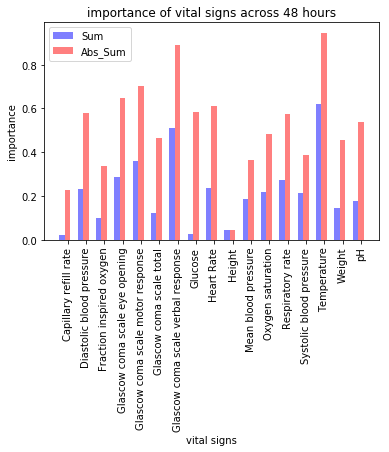

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gcf().subplots_adjust(bottom=0.15)

idx=np.array(range(0,17))
sum_features=[]
coef=clf.coef_[0]
features=[]
for i in range(0,17):
    features.append(coef[i*42:i*42+42])

fig, ax = plt.subplots()
bar_width = 0.3
# sum
sum_=[sum(l) for l in features]
# print (sum_)

header=["Capillary refill rate","Diastolic blood pressure","Fraction inspired oxygen","Glascow coma scale eye opening","Glascow coma scale motor response","Glascow coma scale total","Glascow coma scale verbal response","Glucose","Heart Rate","Height","Mean blood pressure","Oxygen saturation","Respiratory rate","Systolic blood pressure","Temperature","Weight","pH"]
 
print("vital signs: ", header)

sum_=[abs(s) for s in sum_]
print("------------------------------------------------------------ \n",
      "-----------------","importance of sum","----------------- \n",
    "------------------------------------------------------------ \n")
print("importance of sum_: ",np.flip(np.argsort(sum_)))
print("Rank:")
j=1
for i in np.flip(np.argsort(sum_)):
    print(j,'. ',header[i])
    j+=1

index = np.arange(17)
# plt.bar(x, sum_, align='center', alpha=0.5)
rects1 = plt.bar(index, sum_,bar_width,color='b',alpha=0.5,label='Sum')


# abs sum

abs_sum_=[sum(abs(l)) for l in features]
print("------------------------------------------------------------ \n",
      "-----------------","importance of abs_sum_","----------------- \n",
    "------------------------------------------------------------ \n")
print("importance of abs_sum_: ",np.flip(np.argsort(abs_sum_)))
print("Rank:")
j=1
for i in np.flip(np.argsort(abs_sum_)):
    print(j,". ",header[i])
    j+=1
# plt.bar(index, abs_sum_, align='center', alpha=0.5)
rects2 = plt.bar(index + bar_width, abs_sum_,bar_width,color='r',alpha=0.5,label='Abs_Sum')

plt.xlabel('vital signs')
plt.ylabel('importance')
plt.title('importance of vital signs across 48 hours')
ax.set_xticklabels(header, rotation='vertical', fontsize=10)
plt.xticks(index + bar_width,header)
plt.legend()

plt.savefig('result.png', format='png',bbox_inches = "tight",dpi=1000)
plt.show()